In [ ]:
import pandas as pd

path = r"D:\AIML\NutriClass Project\Data\synthetic_food_dataset_imbalanced.csv"

# Read data from the "synthetic_food_dataset_imbalanced.csv" file and store it in a DataFrame named 'df'
df = pd.read_csv(path)
df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


# Data Preprocessing:

In [ ]:
print(df.isna().sum())

# Drop null values
df.dropna(inplace=True)

print(df.isna().sum())


Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


In [ ]:
print(df.duplicated().value_counts())

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

print(df.duplicated().value_counts())

False    31260
True        65
Name: count, dtype: int64
False    31260
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31260 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31260 non-null  float64
 1   Protein             31260 non-null  float64
 2   Fat                 31260 non-null  float64
 3   Carbs               31260 non-null  float64
 4   Sugar               31260 non-null  float64
 5   Fiber               31260 non-null  float64
 6   Sodium              31260 non-null  float64
 7   Cholesterol         31260 non-null  float64
 8   Glycemic_Index      31260 non-null  float64
 9   Water_Content       31260 non-null  float64
 10  Serving_Size        31260 non-null  float64
 11  Meal_Type           31260 non-null  object 
 12  Preparation_Method  31260 non-null  object 
 13  Is_Vegan            31260 non-null  bool   
 14  Is_Gluten_Free      31260 non-null  bool   
 15  Food_Name           31260 non-null  object 
dtypes: bool(2

In [6]:
# Convert the 'Is_Vegan' boolean column to an integer column
df['Is_Vegan'] = df['Is_Vegan'].astype(int)
df['Is_Vegan']


0        0
1        0
2        0
3        0
4        0
        ..
31695    1
31696    0
31697    0
31698    0
31699    0
Name: Is_Vegan, Length: 31260, dtype: int64

In [7]:
# Convert the 'Is_Gluten_Free' boolean column to an integer column
df['Is_Gluten_Free'] = df['Is_Gluten_Free'].astype(int)
df['Is_Gluten_Free']

0        0
1        1
2        0
3        1
4        0
        ..
31695    1
31696    0
31697    0
31698    0
31699    1
Name: Is_Gluten_Free, Length: 31260, dtype: int64

In [8]:
print(df['Meal_Type'].value_counts())
print(df['Preparation_Method'].value_counts())
print(df['Food_Name'].value_counts())

Meal_Type
snack        7892
breakfast    7840
dinner       7770
lunch        7758
Name: count, dtype: int64
Preparation_Method
baked      7940
raw        7837
grilled    7833
fried      7650
Name: count, dtype: int64
Food_Name
Pizza        5900
Burger       4923
Donut        4454
Pasta        3959
Sushi        3450
Ice Cream    2954
Steak        1981
Apple        1471
Banana       1184
Salad         984
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encode the 'Meal_Type' column
df['Meal_Type'] = LabelEncoder().fit_transform(df['Meal_Type'])
print(df.head())

     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4  274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0  647.553389    24.990309       81.575896      45.669118    197.570043   
1   68.572414    34.301652       69.522492      49.854415    103.833510   
2  663.171859    34.816834       62.552384      40.132866    198.989367   
3  300.749543    28.510998       68.688853      57.423461    135.714202   
4  296.314958    15.403173       70.385059      33.170460     73.019474   

   Meal_Type Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0          1              fried         0          

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encode the 'Preparation_Method' column
df['Preparation_Method'] = LabelEncoder().fit_transform(df['Preparation_Method'])
print(df.head())

     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4  274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0  647.553389    24.990309       81.575896      45.669118    197.570043   
1   68.572414    34.301652       69.522492      49.854415    103.833510   
2  663.171859    34.816834       62.552384      40.132866    198.989367   
3  300.749543    28.510998       68.688853      57.423461    135.714202   
4  296.314958    15.403173       70.385059      33.170460     73.019474   

   Meal_Type  Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0          1                   1         0        

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encode the 'Food_Name' column
df['Food_Name'] = LabelEncoder().fit_transform(df['Food_Name'])
print(df.head())

     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4  274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0  647.553389    24.990309       81.575896      45.669118    197.570043   
1   68.572414    34.301652       69.522492      49.854415    103.833510   
2  663.171859    34.816834       62.552384      40.132866    198.989367   
3  300.749543    28.510998       68.688853      57.423461    135.714202   
4  296.314958    15.403173       70.385059      33.170460     73.019474   

   Meal_Type  Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0          1                   1         0        

# Model Training and Evaluation:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying encoded dataframe
scaled_df = df.copy(deep=True)

# Get the list of columns to scale
columns_to_scale = scaled_df.columns.difference(['Food_Name'])

# Apply scaling to the selected columns
scaled_df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

print(scaled_df.head())

   Calories   Protein       Fat     Carbs     Sugar     Fiber    Sodium  \
0  0.189221  0.678076  0.238657  0.564516 -0.486998 -0.359968  1.056400   
1 -0.577922 -0.722612 -0.090688 -0.472937  1.084364 -1.083988 -0.872240   
2  0.585736  0.676250  0.966706  0.066143 -0.292878 -0.669844  1.108427   
3 -0.721382  0.010765 -0.890385  0.291646 -0.738449 -0.098678 -0.098836   
4  0.031850 -0.447007  0.512358  0.090037  1.221471 -0.251318 -0.113608   

   Cholesterol  Glycemic_Index  Water_Content  Serving_Size  Meal_Type  \
0    -0.061472        0.764630      -0.155307      0.983878  -0.448106   
1     0.350383        0.247547       0.069947     -0.950453   1.336100   
2     0.373170       -0.051466      -0.453270      1.013166   1.336100   
3     0.094253        0.211784       0.477316     -0.292569   0.443997   
4    -0.485526        0.284551      -0.827990     -1.586326   1.336100   

   Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0           -0.443745  -0.36297       -0.79

In [ ]:
# Drop null values
scaled_df.dropna(inplace=True)

print(scaled_df.isna().sum())

scaled_df.head()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64
Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,0.189221,0.678076,0.238657,0.564516,-0.486998,-0.359968,1.056400,-0.061472,0.764630,-0.155307,0.983878,-0.448106,-0.443745,-0.36297,-0.790619,6
1,-0.577922,-0.722612,-0.090688,-0.472937,1.084364,-1.083988,-0.872240,0.350383,0.247547,0.069947,-0.950453,1.336100,1.338420,-0.36297,1.264832,4
2,0.585736,0.676250,0.966706,0.066143,-0.292878,-0.669844,1.108427,0.373170,-0.051466,-0.453270,1.013166,1.336100,1.338420,-0.36297,-0.790619,2
3,-0.721382,0.010765,-0.890385,0.291646,-0.738449,-0.098678,-0.098836,0.094253,0.211784,0.477316,-0.292569,0.443997,-0.443745,-0.36297,1.264832,9
4,0.031850,-0.447007,0.512358,0.090037,1.221471,-0.251318,-0.113608,-0.485526,0.284551,-0.827990,-1.586326,1.336100,-1.334828,-0.36297,-0.790619,3


In [ ]:
from sklearn.model_selection import train_test_split

# Select Features
feature = scaled_df.drop('Food_Name', axis=1)

# Select Target
target = scaled_df['Food_Name']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data shape
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (25008, 15)
Shape of testing feature: (6252, 15)
Shape of training label: (25008,)
Shape of testing label: (6252,)


In [ ]:
from sklearn import metrics


def evaluate_model(model, x_test, y_test):
    """
        This function evaluates the input model based on input test data 
        and displays the evaluation metrics (accuracy, precision, recall, 
        f1-score and confussion matrix).

        Arguments:
            Model: The Classification model to be evaluated
            x_test: X test data
            y_test: y test data
        Returns:
            Displays Accuracy, Precision, Recall, f1-score, confussion matrix scores
            returns Accuracy score 

    """

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='micro')
    rec = metrics.recall_score(y_test, y_pred, average='micro')
    f1 = metrics.f1_score(y_test, y_pred, average='micro')

    # Calculate confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Display all the metrics for the model
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', cm)

    # Return accuracy score
    return {'acc': acc}

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build Logistic Regression model 
lr_model = LogisticRegression()

# Train Logistic Regression model 
lr_model.fit(X_train, y_train)

c:\Users\My Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Evaluate Logistic Regression model 
lr_eval = evaluate_model(lr_model, X_test, y_test)

Accuracy: 0.995361484325016
Precision: 0.995361484325016
Recall: 0.995361484325016
F1 Score: 0.995361484325016
Confusion Matrix:
 [[ 276    0    0    0    0    0    0    0    0    0]
 [   3  232    0    0    0    0    0    0    0    0]
 [   0    0  983    0    0    0    9    0    0    0]
 [   0    0    1  899    0    0    0    0    0    0]
 [   0    0    0    0  575    0    0    0    0    0]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0   10    3    0    0 1165    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    2    0    0    0    0  687]]
0.995361484325016


In [ ]:
from sklearn import tree

# Build Decision Tree Classifier model 
dtc = tree.DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifier model 
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:

# Evaluate Decision Tree Classifier model 
dtc_eval = evaluate_model(dtc, X_test, y_test)

Accuracy: 0.9902431222008957
Precision: 0.9902431222008957
Recall: 0.9902431222008957
F1 Score: 0.9902431222008957
Confusion Matrix:
 [[ 275    1    0    0    0    0    0    0    0    0]
 [   4  231    0    0    0    0    0    0    0    0]
 [   0    0  962    2    0    0   28    0    0    0]
 [   0    0    1  899    0    0    0    0    0    0]
 [   0    0    0    0  572    0    0    0    3    0]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0   15    4    0    0 1159    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    2    0    0    0    0  687]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest Classifier model 
rf = RandomForestClassifier(random_state=0)

# Train Random Forest Classifier model 
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Evaluate Random Forest Classifier model
rf_eval = evaluate_model(rf, X_test, y_test)

Accuracy: 0.9940818937939859
Precision: 0.9940818937939859
Recall: 0.9940818937939859
F1 Score: 0.9940818937939859
Confusion Matrix:
 [[ 275    1    0    0    0    0    0    0    0    0]
 [   4  231    0    0    0    0    0    0    0    0]
 [   0    0  980    1    0    0   11    0    0    0]
 [   0    0    1  899    0    0    0    0    0    0]
 [   0    0    0    0  572    0    0    0    3    0]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0    7    5    0    1 1165    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    2    0    0    0    0  687]]
0.9940818937939859


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build KNeighbors Classifier model 
knn = KNeighborsClassifier()

# Train KNeighbors Classifier model 
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Evaluate KNeighbors Classifier Model
knn_eval = evaluate_model(knn, X_test, y_test)

Accuracy: 0.9915227127319258
Precision: 0.9915227127319258
Recall: 0.9915227127319258
F1 Score: 0.9915227127319258
Confusion Matrix:
 [[ 274    2    0    0    0    0    0    0    0    0]
 [   3  232    0    0    0    0    0    0    0    0]
 [   0    0  963    1    0    1   27    0    0    0]
 [   0    0    0  899    0    1    0    0    0    0]
 [   0    0    0    0  572    0    0    0    3    0]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0    8    4    0    0 1166    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    2    0    0    0    0  687]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Build Gradient Boosting Classifier model 
gbc=GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5)

# Train Gradient Boosting Classifier model
gbc.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
# Evaluate Gradient Boosting Classifier model 
gbc_eval = evaluate_model(gbc, X_test, y_test)

Accuracy: 0.9952015355086372
Precision: 0.9952015355086372
Recall: 0.9952015355086372
F1 Score: 0.9952015355086372
Confusion Matrix:
 [[ 275    1    0    0    0    0    0    0    0    0]
 [   2  233    0    0    0    0    0    0    0    0]
 [   0    0  983    1    0    1    7    0    0    0]
 [   0    0    0  899    0    1    0    0    0    0]
 [   0    0    0    0  572    0    0    0    2    1]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0    6    5    0    1 1166    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    1    0    0    0    0  688]]


In [ ]:
from sklearn.svm import SVC

# Build Support Vector Machine model
svm = SVC(kernel="linear", C=1)

# Train Support Vector Machine model
svm.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Evaluate Support Vector Machine model
svm_eval = evaluate_model(svm, X_test, y_test)

Accuracy: 0.9950415866922585
Precision: 0.9950415866922585
Recall: 0.9950415866922585
F1 Score: 0.9950415866922585
Confusion Matrix:
 [[ 276    0    0    0    0    0    0    0    0    0]
 [   3  232    0    0    0    0    0    0    0    0]
 [   0    0  980    0    0    0   12    0    0    0]
 [   0    0    1  899    0    0    0    0    0    0]
 [   0    0    0    0  575    0    0    0    0    0]
 [   0    0    0    1    0  779    0    0    0    0]
 [   0    0    7    5    0    0 1166    0    0    0]
 [   0    0    0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0    0    0  408    0]
 [   0    0    0    0    2    0    0    0    0  687]]


# Bar plot to display Classification models vs Accuracy scores

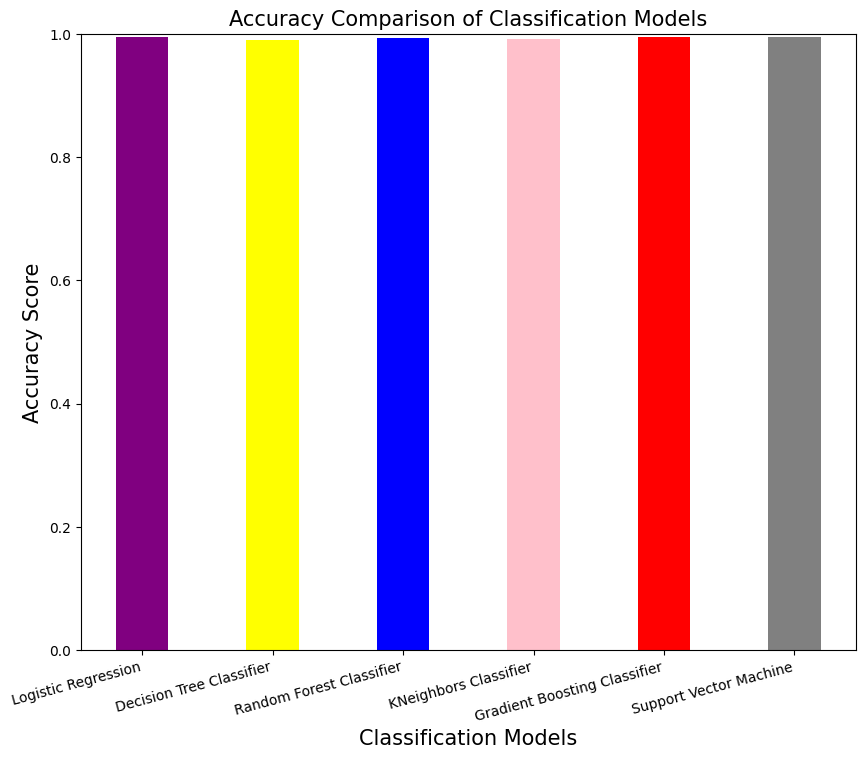

In [135]:
import matplotlib.pyplot as plt

# Names of the Classification models
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
          'KNeighbors Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']

# Set colors for the bar plot
colors = ['purple','yellow', 'blue', 'pink', 'red', 'grey']

# Set the list of Accuracy Scores for each Classification model
accuracy_scores = [lr_eval['acc'], dtc_eval['acc'], rf_eval['acc'], knn_eval['acc'], gbc_eval['acc'], svm_eval['acc']]

# Set the bar plot and display
plt.figure(figsize=(10,8))
plt.bar(models, accuracy_scores, width=0.4, color=colors)

plt.xlabel('Classification Models', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('Accuracy Comparison of Classification Models', fontsize=15)

plt.ylim(0, 1)
plt.xticks(rotation=15,ha='right')

plt.show()